# Optimization
--------------------

In this notebook, we will take a look at the main features of the code through simple examples using the `Optimization` class.

## The simplest optimization
------------------------------------

In principle, the only class needed in a standard script is the `Optimization` class. This is the minimal and most straightforward way to perform a spatial clustering on a system.

To be instantiated, this class only requires one positional argument: the path to a trajectory file in a supported format (or an instance of `pysc.trajectory.Trajectory`). See **notebook #1** for details about trajectories.

Let's have a look, using a simple Lennard-Jones binary mixture known as a Kob-Andersen mixture:

In [1]:
from pysc import Optimization

opt = Optimization('../data/kalj_N150.xyz')
opt.run()

This is the most minimalist script: we open a trajectory file through the `Optimization` class, and use the default parameters to perform a clustering.

Other parameters can be set when creating an optimization:
* `descriptor`: the type of structural descriptor to use to perform the clustering. This must be a short string or an instance of `pysc.descriptor.StructuralDescriptor`. The default value is set to `"gr"`, which is the symbol of the `RadialDescriptor` class. Setting this parameter to an instance is also possible.
* `scaling`: type of feature scaling to apply on the data. Default is `None`, but a short string (e.g. `"zscore"` or `"minmax"`) or an instance of the associated classes is also possible.
* `dim_redux`: dimensionality reduction method. Default value is `None`, but a short string (e.g. `"pca"` or `"tsne"`) or an instance of the associated classes is also possible.
* `clustering`: clustering algorithm. Default is `"kmeans"`, but other short strings (`"gmm"` or `"cinf"`) or an instance of the associated classes is also possible.

With these first three lines of code above, we basically used the radial distribution of the particles to form clusters using the K-Means algorithm (no feature scaling or dimensionality reduction by default). Let's have a look at the bulk radial distribution, and the distributions restricted to the clusters:

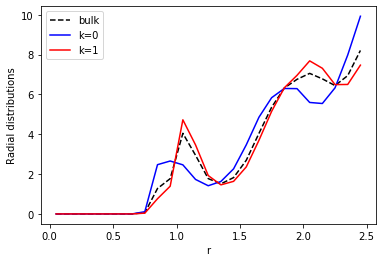

In [3]:
import matplotlib.pyplot as plt

# grid and average distribution
r = opt.descriptor.grid
p_r = opt.descriptor.average

# dataset: all the individual radial distributions of the particles
data = opt.descriptor.features
# distributions of the clusters
pk_r = opt.clustering.centroids(data)

# plot
plt.plot(r, p_r, c='k', ls='--', label='bulk')
plt.plot(r, pk_r[0], c='b', label='k=0')
plt.plot(r, pk_r[1], c='r', label='k=1')
plt.xlabel('r')
plt.ylabel('Radial distributions')
plt.legend()
plt.show()

We see that the bulk distribution (dashed line) has been split into two quite different distributions. Let's have a look at a more common quantity: the radial distribution function, $g(r)$.

The class `RadialDescriptor`, used here to compute the radial correlations, implements a normalization function that allows us to get a $g(r)$ from the average distributions:

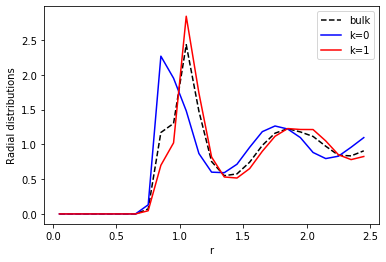

In [4]:
# normalization function
norm = opt.descriptor.normalize_gr

# plot normalized g(r)
plt.plot(r, norm(p_r), c='k', ls='--', label='bulk')
plt.plot(r, norm(pk_r[0]), c='b', label='k=0')
plt.plot(r, norm(pk_r[1]), c='r', label='k=1')
plt.xlabel('r')
plt.ylabel('Radial distributions')
plt.legend()
plt.show()